<a href="https://colab.research.google.com/github/kingy0ujin/2024-1-my-BDA/blob/main/inclass/02w_0319_tue_dataframe_basic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **빅데이터 분석 프로그래밍**#


## 파이썬 설치 확인

In [3]:
import sys
import pandas as pd
import numpy as np

print(sys.version)
print(pd.__version__)
print(np.__version__)

3.10.12 (main, Nov 20 2023, 15:14:05) [GCC 11.4.0]
1.5.3
1.25.2


## 코렙에서 한글 처리

In [4]:
!pip install koreanize_matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 46.5 MB/s eta 0:00:00


In [5]:
%config InlineBackend.figure_format = "retina"

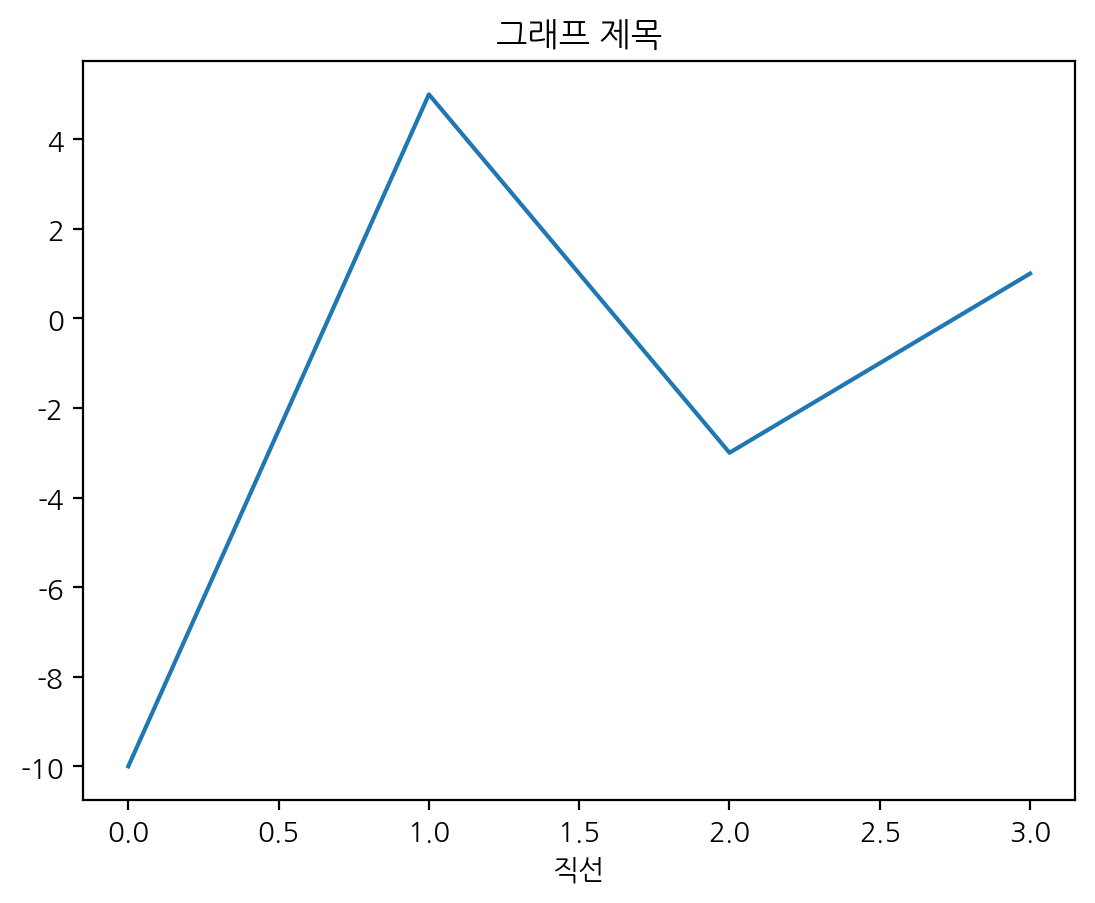

In [6]:
import matplotlib.pyplot as plt
import koreanize_matplotlib

plt.plot([-10, 5, -3, 1])
plt.title('그래프 제목')
plt.xlabel('직선')
plt.show()

## 데이터 분석을 위한 seaborn 내장(토이) 데이터, titanic

In [7]:
import seaborn as sns

titanic = sns.load_dataset("titanic")
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [8]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


<Axes: xlabel='sex', ylabel='count'>

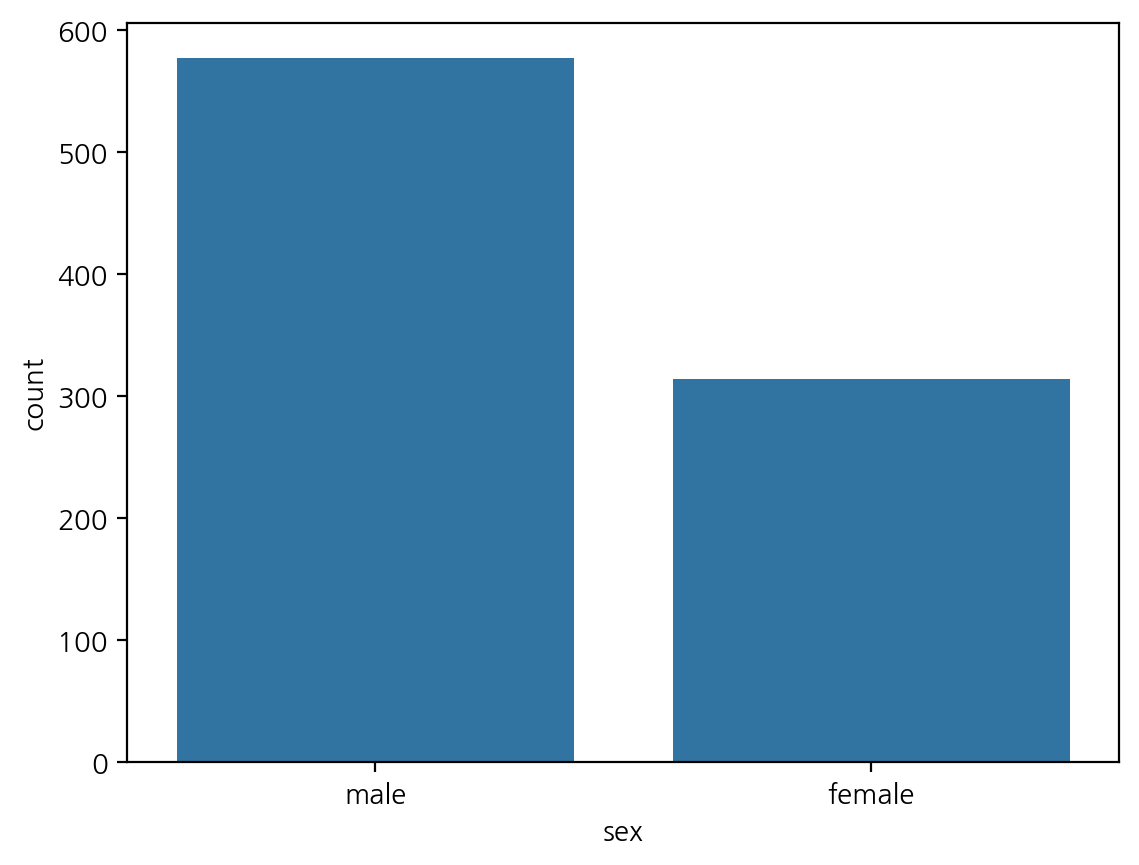

In [10]:
sns.countplot(titanic, x="sex")

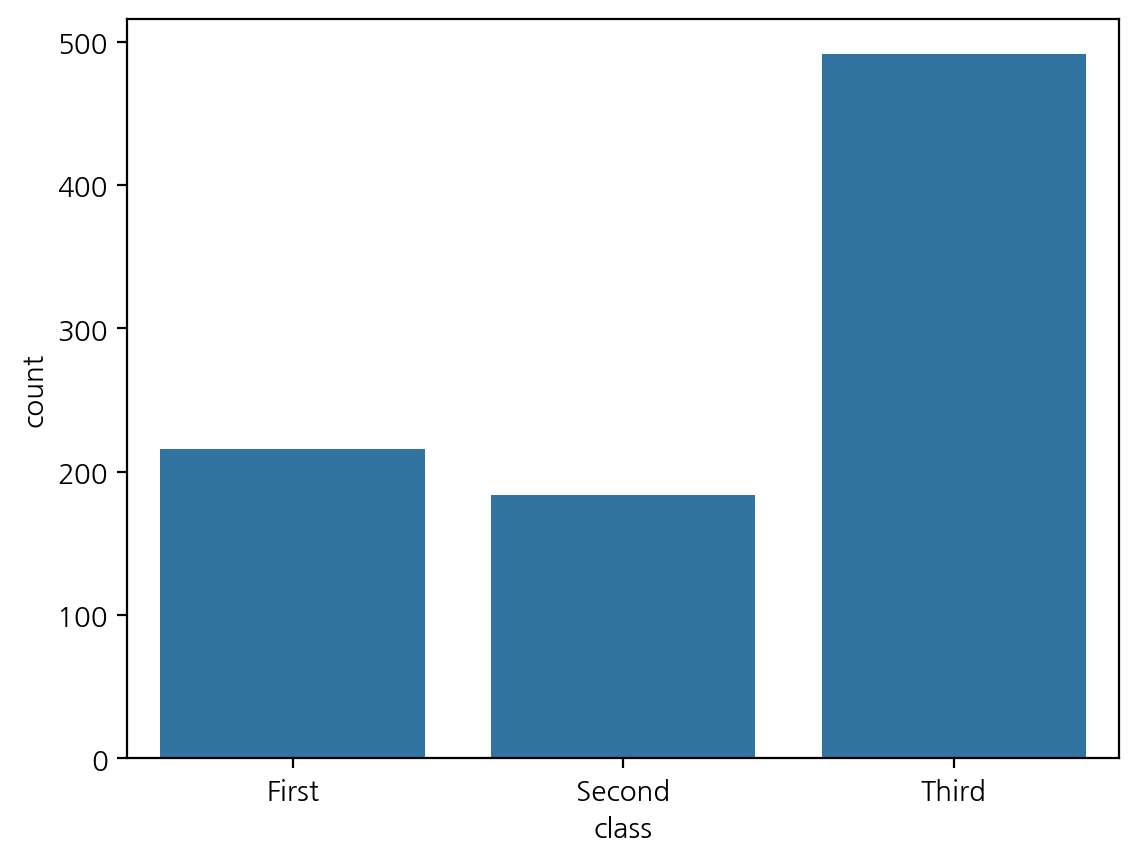

In [12]:
sns.countplot(titanic, x="class");

<Axes: xlabel='deck', ylabel='count'>

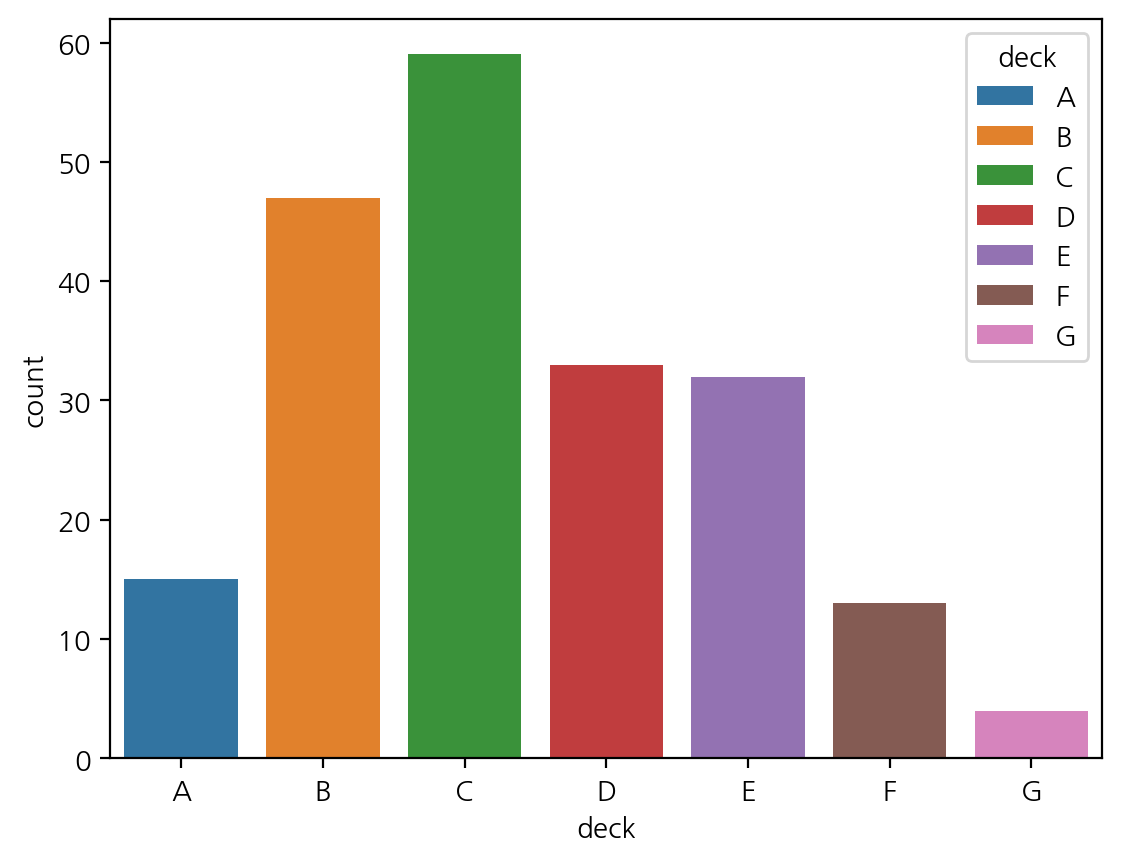

In [14]:
sns.countplot(titanic, x="deck", hue="deck")

<Axes: xlabel='class', ylabel='count'>

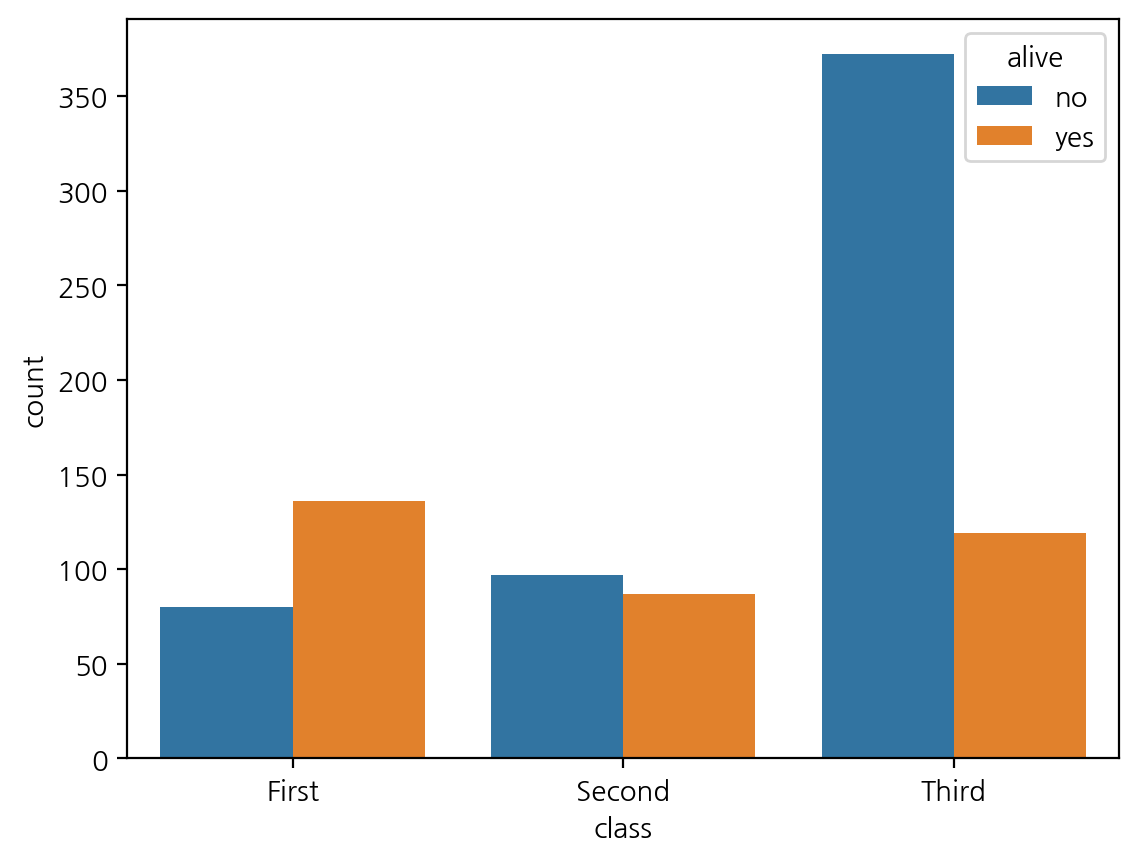

In [15]:
sns.countplot(titanic, x="class", hue="alive")

<Axes: xlabel='who', ylabel='percent'>

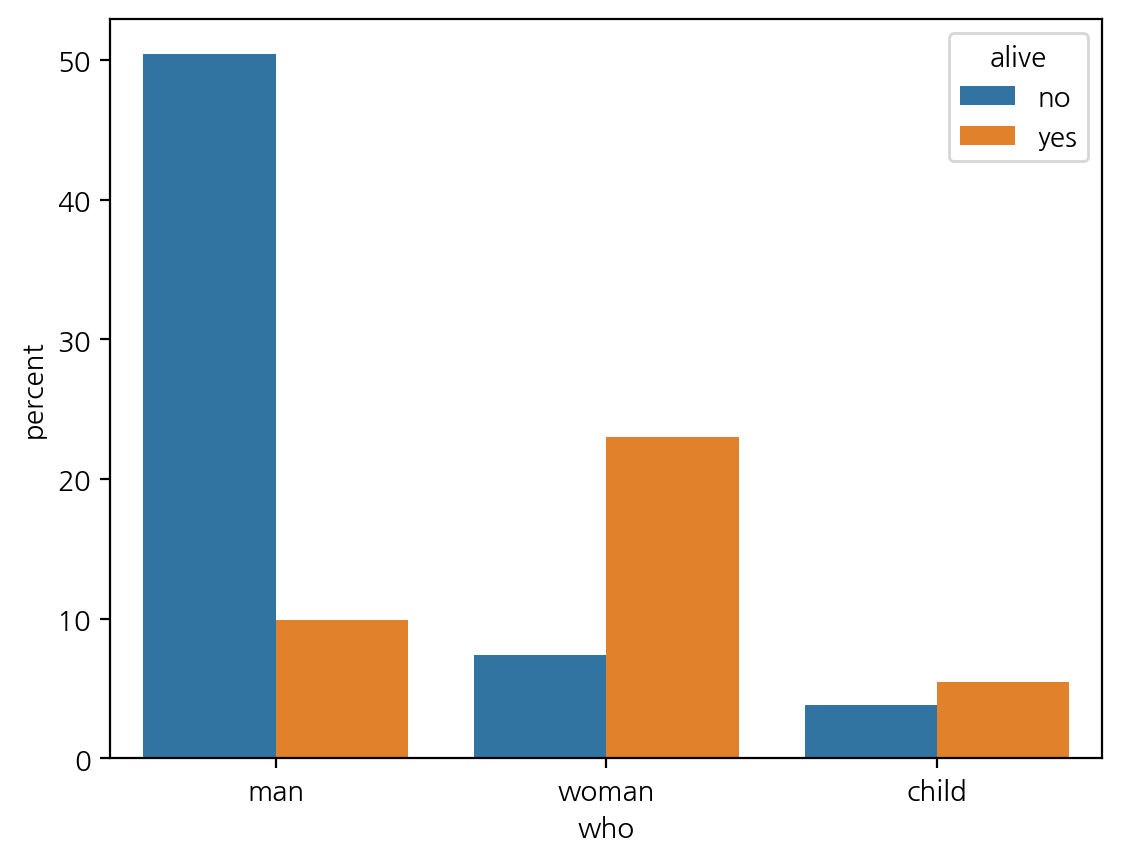

In [16]:
sns.countplot(titanic, x="who", hue="alive", stat = "percent") #stat : count(숫자)가 아닌 분포로

## 열 검사

In [19]:
titanic["pclass"]

0      3
1      1
2      3
3      1
4      3
      ..
886    2
887    1
888    3
889    1
890    3
Name: pclass, Length: 891, dtype: int64

In [18]:
type(titanic["pclass"])

pandas.core.series.Series

In [20]:
titanic.pclass

0      3
1      1
2      3
3      1
4      3
      ..
886    2
887    1
888    3
889    1
890    3
Name: pclass, Length: 891, dtype: int64

In [22]:
titanic[["pclass"]] #한 칼럼을 가지는 데이터 프레임


,pclass
0,3
1,1
2,3
3,1
4,3
...,...
886,2
887,1
888,3
889,1


In [128]:
titanic[["pclass","alive"]] #두개의 컬럼을 가지는 데이터 프레임

,pclass,alive
0,3,no
1,1,yes
2,3,yes
3,1,yes
4,3,no
...,...,...
886,2,no
887,1,yes
888,3,no
889,1,yes


In [26]:
titanic.pclass.values

array([3, 1, 3, 1, 3, 3, 1, 3, 3, 2, 3, 1, 3, 3, 3, 2, 3, 2, 3, 3, 2, 2,
       3, 1, 3, 3, 3, 1, 3, 3, 1, 1, 3, 2, 1, 1, 3, 3, 3, 3, 3, 2, 3, 2,
       3, 3, 3, 3, 3, 3, 3, 3, 1, 2, 1, 1, 2, 3, 2, 3, 3, 1, 1, 3, 1, 3,
       2, 3, 3, 3, 2, 3, 2, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 1, 2, 3, 3, 3,
       1, 3, 3, 3, 1, 3, 3, 3, 1, 1, 2, 2, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3,
       1, 3, 3, 3, 3, 3, 3, 2, 1, 3, 2, 3, 2, 2, 1, 3, 3, 3, 3, 3, 3, 3,
       3, 2, 2, 2, 1, 1, 3, 1, 3, 3, 3, 3, 2, 2, 3, 3, 2, 2, 2, 1, 3, 3,
       3, 1, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 1, 3, 1, 3, 1, 3, 3, 3, 1, 3,
       3, 1, 2, 3, 3, 2, 3, 2, 3, 1, 3, 1, 3, 3, 2, 2, 3, 2, 1, 1, 3, 3,
       3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 2, 3, 2, 3, 1, 3, 2, 1, 2,
       3, 2, 3, 3, 1, 3, 2, 3, 2, 3, 1, 3, 2, 3, 2, 3, 2, 2, 2, 2, 3, 3,
       2, 3, 3, 1, 3, 2, 1, 2, 3, 3, 1, 3, 3, 3, 1, 1, 1, 2, 3, 3, 1, 1,
       3, 2, 3, 3, 1, 1, 1, 3, 2, 1, 3, 1, 3, 2, 3, 3, 3, 3, 3, 3, 1, 3,
       3, 3, 2, 3, 1, 1, 2, 3, 3, 1, 3, 1, 1, 1, 3,

In [27]:
titanic.pclass.unique() #유니크한 값

array([3, 1, 2])

In [28]:
titanic.pclass.nunique() #유니크한 값이 몇개인지

3

In [31]:
titanic.nunique()

survived         2
pclass           3
sex              2
age             88
sibsp            7
parch            7
fare           248
embarked         3
class            3
who              3
adult_male       2
deck             7
embark_town      3
alive            2
alone            2
dtype: int64

In [34]:
titanic.pclass.value_counts()

3    491
1    216
2    184
Name: pclass, dtype: int64

In [36]:
titanic.pclass.value_counts().sort_index()


1    216
2    184
3    491
Name: pclass, dtype: int64

In [37]:
titanic.deck.value_counts()

C    59
B    47
D    33
E    32
A    15
F    13
G     4
Name: deck, dtype: int64

## 열 별 그룹화

In [40]:
titanic.groupby('sex').count() # 자기 자신을 제외한 나머지 열로 그룹화(?)

,survived,pclass,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
sex,,,,,,,,,,,,,,
female,314,314,261,314,314,314,312,314,314,314,97,312,314,314
male,577,577,453,577,577,577,577,577,577,577,106,577,577,577


In [41]:
titanic.groupby('who').count()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,adult_male,deck,embark_town,alive,alone
who,,,,,,,,,,,,,,
child,83,83,83,83,83,83,83,83,83,83,13,83,83,83
man,537,537,537,413,537,537,537,537,537,537,99,537,537,537
woman,271,271,271,218,271,271,271,269,271,271,91,269,271,271


In [42]:
titanic.groupby('embark_town').count() # embark_town : Southampton에서 출발->Cherbourg->Queenstown

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,alive,alone
embark_town,,,,,,,,,,,,,,
Cherbourg,168,168,168,130,168,168,168,168,168,168,168,69,168,168
Queenstown,77,77,77,28,77,77,77,77,77,77,77,4,77,77
Southampton,644,644,644,554,644,644,644,644,644,644,644,128,644,644


In [43]:
titanic.groupby("pclass")

In [44]:
titanic.groupby("pclass")["fare"]

In [45]:
titanic.groupby("pclass")["fare"].mean()

pclass
1    84.154687
2    20.662183
3    13.675550
Name: fare, dtype: float64

## 막대 그래프

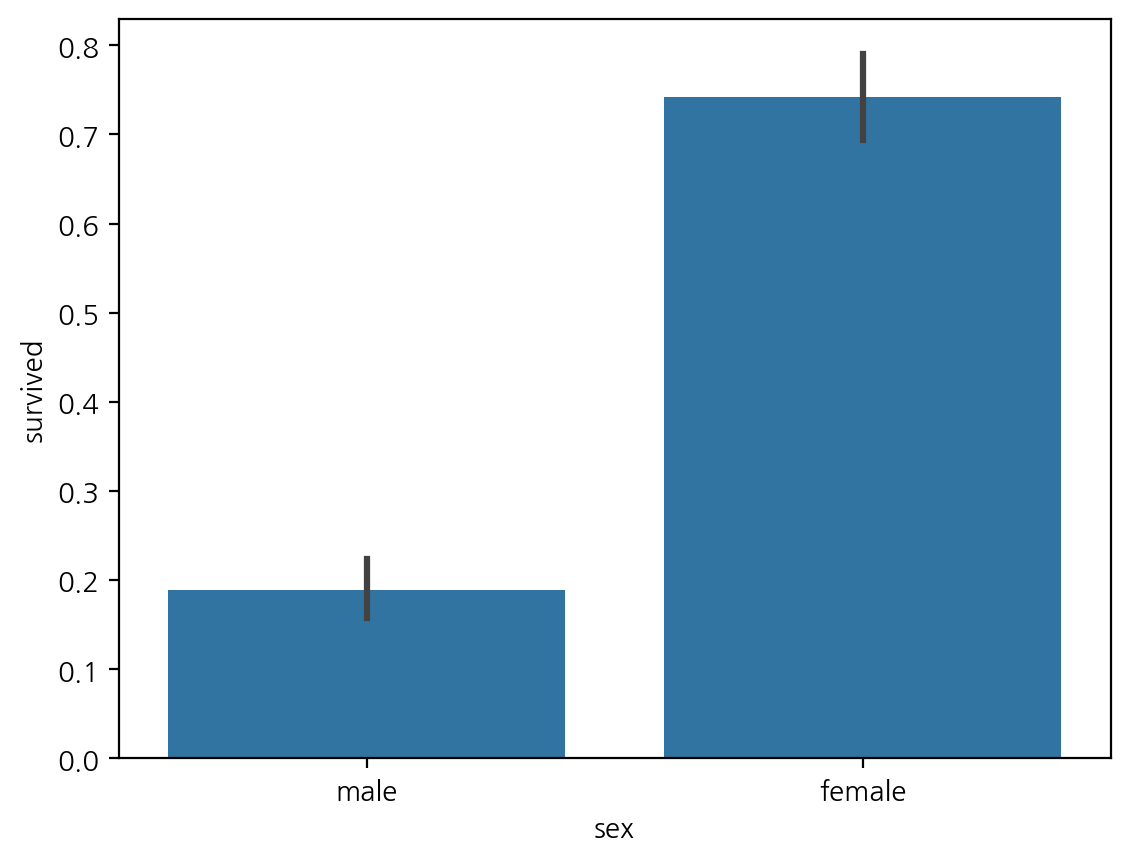

In [48]:
sns.barplot(data = titanic, x="sex", y = "survived"); # 높이 = 평균 -> 남자의 생존률 = 20%, 여자의 생존률 = 70% / "data = " ->써도 되고 안써도 됨, 인자가 데이터라는 의미

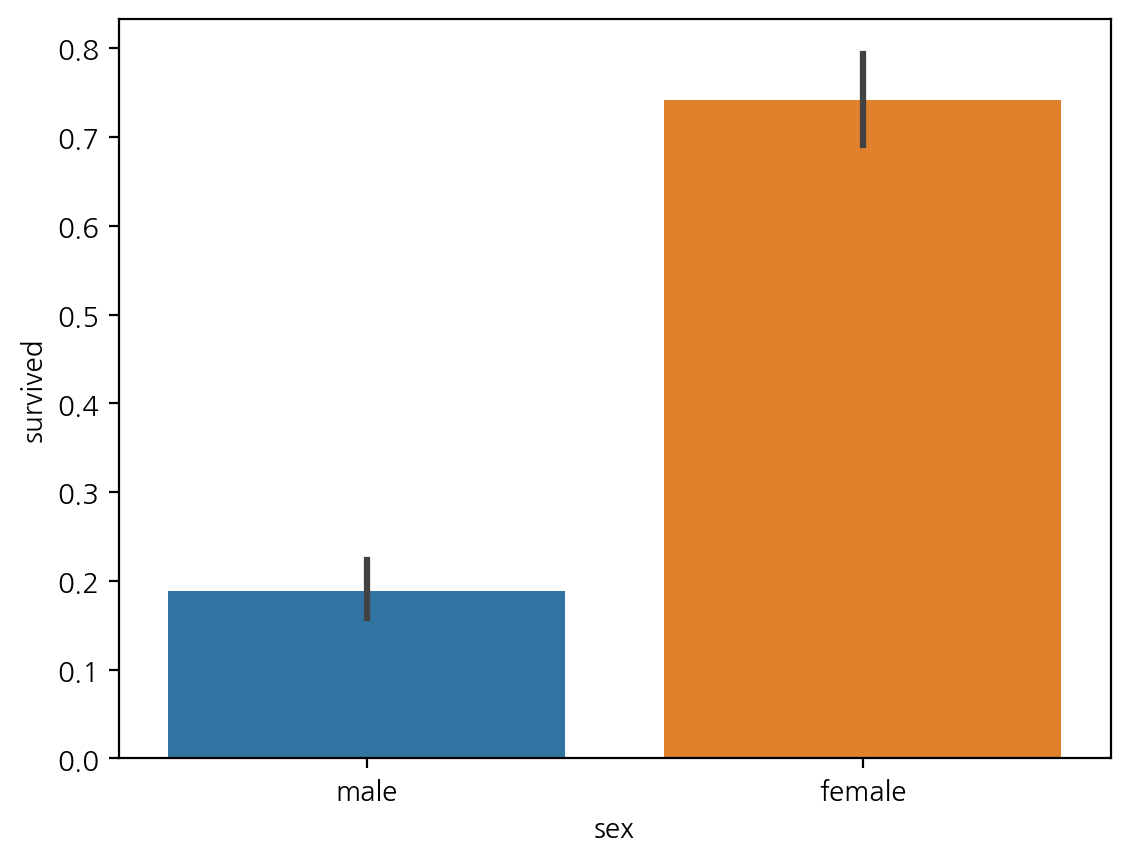

In [49]:
sns.barplot(data = titanic, x="sex", y = "survived", hue = "sex");

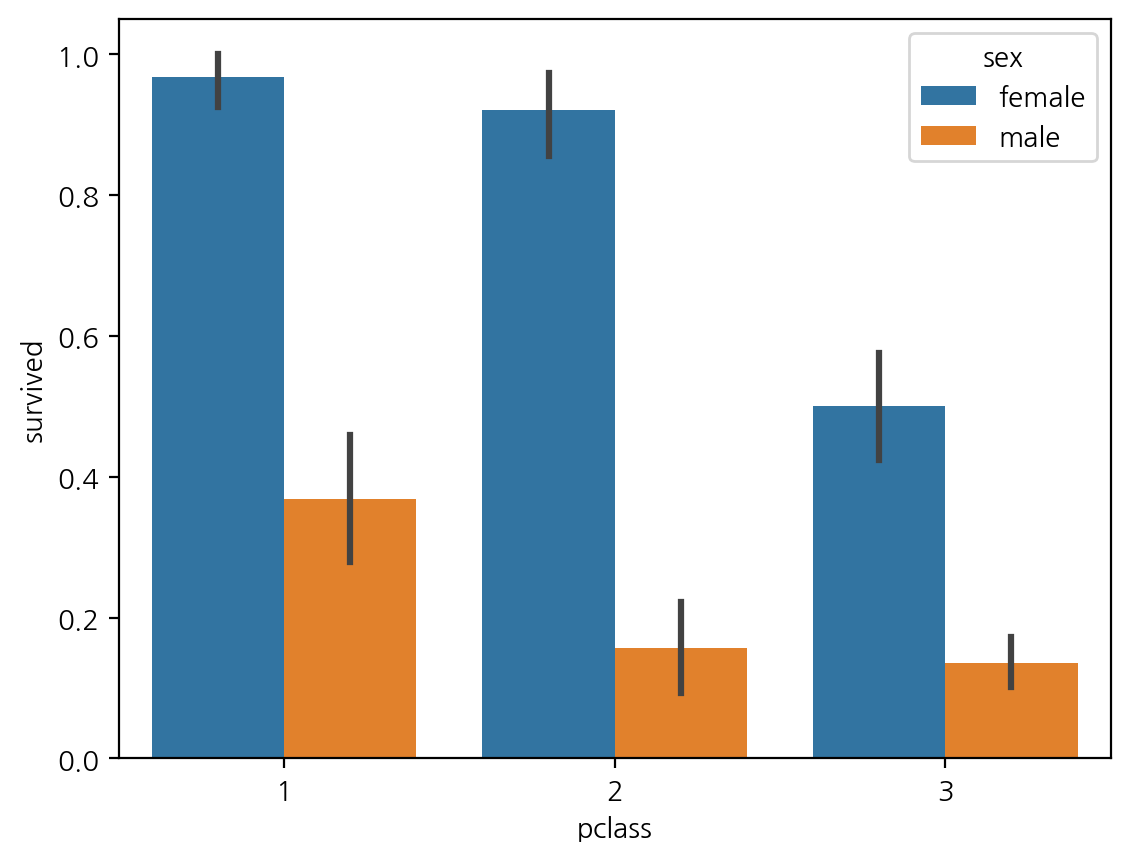

In [50]:
sns.barplot( titanic, x="pclass", y = "survived", hue = "sex");

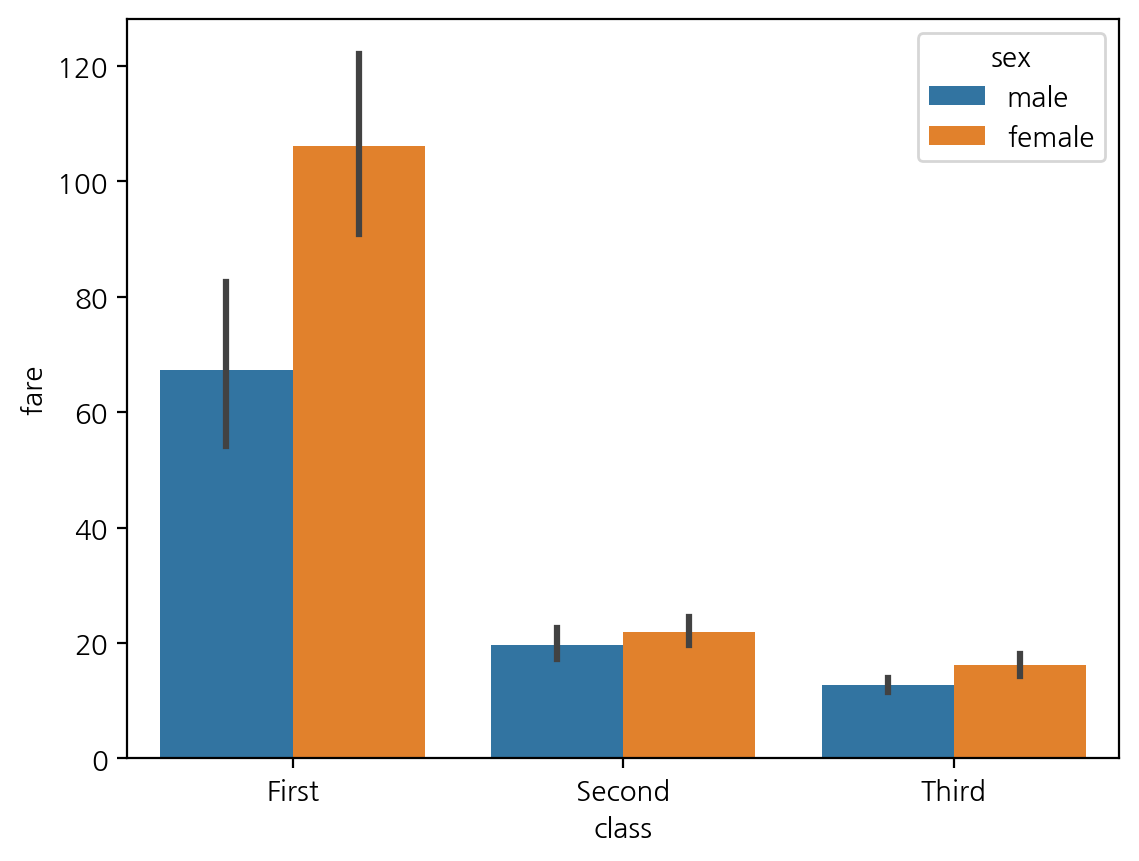

In [52]:
sns.barplot( titanic, x="class", y = "fare", hue = "sex"); #pclass -> 숫자로

<Axes: xlabel='deck', ylabel='fare'>

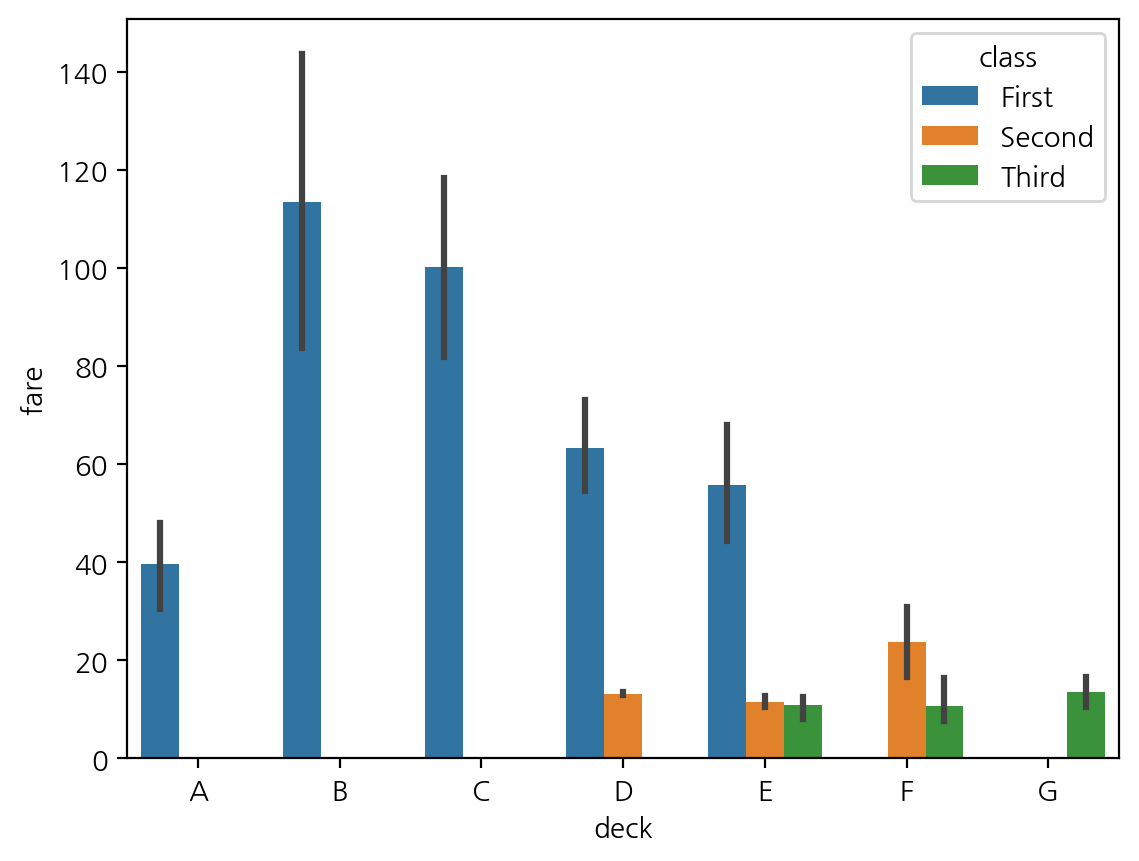

In [54]:
sns.barplot( titanic, x="deck", y = "fare", hue = "class")

<Axes: xlabel='deck', ylabel='survived'>

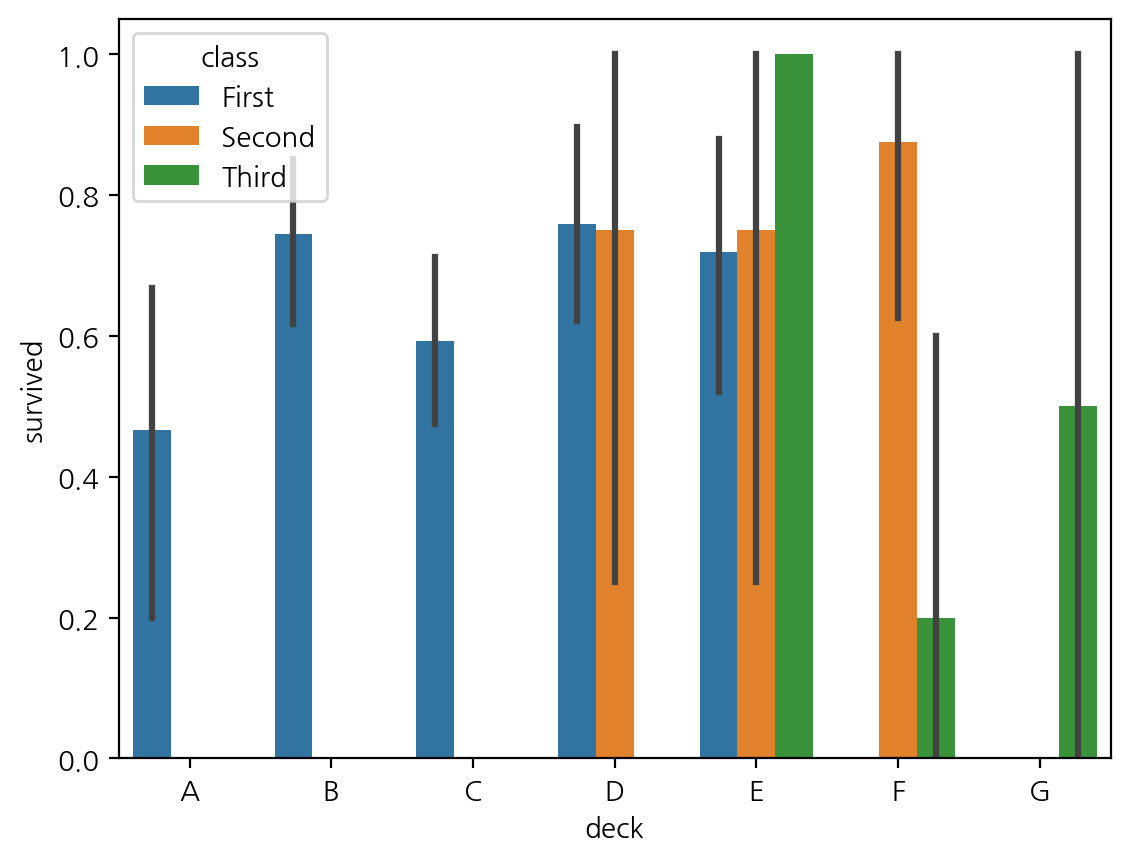

In [55]:
sns.barplot( titanic, x="deck", y = "survived", hue = "class")

## 단원 4 데이터프레임의 세계로

In [57]:
import pandas as pd

df = pd.DataFrame({"name": ["김지훈", "이유진","박종현","김민지"],
                   "english" : [90,80,60,70],
                   "math" : [50, 60, 100, 20]}) # 딕셔너리 형태로 -> "키" : [리스트로 이루어진 값]
df

,name,english,math
0,김지훈,90,50
1,이유진,80,60
2,박종현,60,100
3,김민지,70,20


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   name     4 non-null      object
 1   english  4 non-null      int64 
 2   math     4 non-null      int64 
dtypes: int64(2), object(1)
memory usage: 224.0+ bytes


In [59]:
df.describe() # 기초통계 값

,english,math
count,4.000000,4.000000
mean,75.000000,57.500000
std,12.909944,33.040379
min,60.000000,20.000000
25%,67.500000,42.500000
50%,75.000000,55.000000
75%,82.500000,70.000000
max,90.000000,100.000000


In [61]:
df.describe(include ="all")

,name,english,math
count,4,4.000000,4.000000
unique,4,NaN,NaN
top,김지훈,NaN,NaN
freq,1,NaN,NaN
mean,NaN,75.000000,57.500000
std,NaN,12.909944,33.040379
min,NaN,60.000000,20.000000
25%,NaN,67.500000,42.500000
50%,NaN,75.000000,55.000000
75%,NaN,82.500000,70.000000


## 특정 변수의 값 추출하기

In [62]:
df["math"]

0     50
1     60
2    100
3     20
Name: math, dtype: int64

In [63]:
sum(df["math"]) # 파이썬 내장함수 sum 사용

230

In [64]:
sum(df["english"])

300

In [66]:
df["math"].sum() #데이터 프레임 내부의 메소드 사용

230

In [69]:
df["math"].mean() #평균 구하기

57.5

In [71]:
df.sum() # 문자열도 sum이 가능/ 열에 대한 합(axis=0과 동일한 결과)

name       김지훈이유진박종현김민지
english             300
math                230
dtype: object

In [72]:
df.sum(axis=0)

name       김지훈이유진박종현김민지
english             300
math                230
dtype: object

In [73]:
df.sum(axis=0, numeric_only=True)

english    300
math       230
dtype: int64

In [79]:
df.sum(axis='index', numeric_only=True)

english    300
math       230
dtype: int64

In [74]:
df.sum(axis=1, numeric_only=True)

0    140
1    140
2    160
3     90
dtype: int64

In [78]:
df.sum(axis='columns', numeric_only=True)

0    140
1    140
2    160
3     90
dtype: int64

In [80]:
df.mean(axis='columns', numeric_only=True) # 1과 동일

0    70.0
1    70.0
2    80.0
3    45.0
dtype: float64

In [81]:
df.mean(axis='index', numeric_only=True) # 0과 동일

english    75.0
math       57.5
dtype: float64

## 4-3 외부 데이터 이용하기 - 축적된 시험 성적 데이터를 불러오자!

외부 데이터 불러오기

1. c드라이브에 2024-B-BDA -> github 파일 만들고 깃배쉬로 열기
2. $ git clone 불러올 파일 주소 명령어 입력
3.  구글 코랩에 파일 드래그 앤 드롭하기

In [85]:
df_exam = pd.read_excel('excel_exam.xlsx') # 엑셀 파일을 불러와 df_exam에 할당
df_exam                                    # 출력

,id,nclass,math,english,science
0,1,1,50,98,50
1,2,1,60,97,60
2,3,1,45,86,78
3,4,1,30,98,58
4,5,2,25,80,65
5,6,2,50,89,98
6,7,2,80,90,45
7,8,2,90,78,25
8,9,3,20,98,15
9,10,3,50,98,45


In [86]:
sum(df_exam['english']) / len(df_exam) # len은 행수

84.9

In [87]:
df_exam['english'].mean()

84.9

In [89]:
df_exam.english.mean()

84.9

In [90]:
# 과학 성적 평균

In [91]:
df_exam['science'].mean()

59.45

In [92]:
df_exam.science.mean()

59.45

In [94]:
sum(df_exam['science']) / len(df_exam)
sum(df_exam['science'] / 20)
df_exam.science.mean()

59.45

## 엑셀 파일의 첫 번째 행이 변수명이 아니라면?

In [102]:
df_exam_novar = pd.read_excel('excel_exam_novar.xlsx')
df_exam_novar

,1,1.1,50,98,50.1
0,2,1,60,97,60
1,3,2,25,80,65
2,4,2,50,89,98
3,5,3,20,98,15
4,6,3,50,98,45
5,7,4,46,98,65
6,8,4,48,87,12


In [104]:
df_exam_novar = pd.read_excel('excel_exam_novar.xlsx', header = None)
df_exam_novar

,0,1,2,3,4
0,1,1,50,98,50
1,2,1,60,97,60
2,3,2,25,80,65
3,4,2,50,89,98
4,5,3,20,98,15
5,6,3,50,98,45
6,7,4,46,98,65
7,8,4,48,87,12


## 엑셀 파일에 시트가 여러 개 있다면?

In [105]:
# sheet2 데이터 불러오기
df_exam = pd.read_excel('excel_exam.xlsx', sheet_name = "Sheet2")
df_exam.head()

,id,nclass,math,english,science
0,1,1,100,100,98
1,2,1,60,97,60
2,3,1,45,86,78
3,4,1,30,98,58
4,5,2,25,80,65


In [98]:
# 세 번째 시트의 데이터 불러오기
df_exam = pd.read_excel('excel_exam.xlsx', sheet_name = 2)
df_exam.head()

,id,nclass,math,english,science
0,1,1,100,100,98
1,2,1,90,90,90
2,3,1,45,86,78
3,4,1,30,98,58
4,5,2,25,80,65


In [99]:
df_exam.tail()

,id,nclass,math,english,science
15,16,4,58,98,65
16,17,5,65,68,98
17,18,5,80,78,90
18,19,5,89,68,87
19,20,5,78,83,58


In [100]:
df_csv_exam = pd.read_csv('exam.csv')
df_csv_exam.head()

,id,nclass,math,english,science
0,1,1,50,98,50
1,2,1,60,97,60
2,3,1,45,86,78
3,4,1,30,98,58
4,5,2,25,80,65


In [125]:
df_csv_exam.to_csv("output_newdata.csv")

In [126]:
df_csv_exam.to_csv("output_newdata.csv", index=False)

# 혼자서 해보기

In [111]:
df = pd.DataFrame({"제품" : ["사과", "딸기", "수박"],
                   "가격" : [1800,  1500, 3000],
                   "판매량" : [24, 38, 13]})

df

,제품,가격,판매량
0,사과,1800,24
1,딸기,1500,38
2,수박,3000,13


In [121]:
print(sum(df["가격"]) / len(df))
print(sum(df["가격"])/3)
print(df["가격"].mean())

2100.0
2100.0
2100.0


In [122]:
print(sum(df["판매량"]) / len(df))
print(sum(df["판매량"])/3)
print(df["판매량"].mean())

25.0
25.0
25.0


In [127]:
df.sum(axis=0)

제품     사과딸기수박
가격       6300
판매량        75
dtype: object

# 정리하기

In [106]:
# 1.데이터 프레임 만들기

In [107]:
# 2.외부 데이터 이용하기

# 엑셀 파일 불러오기

In [108]:
# csv 파일 불러오기

In [109]:
# csv 파일로 저장하기